In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Australian Open

### Men

In [2]:
aus_open_m = pd.read_csv('AusOpen-men-2013.csv')
aus_open_m.head()

,Player1,Round,Result,FNL1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,3,8.0,11.0,70,3,6.0,1.0,NaN,NaN
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,7,14,NaN,NaN,80,6,6.0,6.0,NaN,NaN
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,9,16.0,23.0,106,4,5.0,4.0,NaN,NaN
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,6,9,NaN,NaN,104,6,6.0,6.0,NaN,NaN
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,3,12,9.0,13.0,128,6,4.0,6.0,2.0,NaN


In [3]:
list(aus_open_m)

['Player1',
 'Round',
 'Result',
 'FNL1',
 'FSP.1',
 'FSW.1',
 'SSP.1',
 'SSW.1',
 'ACE.1',
 'DBF.1',
 'WNR.1',
 'UFE.1',
 'BPC.1',
 'BPW.1',
 'NPA.1',
 'NPW.1',
 'TPW.1',
 'ST1.1',
 'ST2.1',
 'ST3.1',
 'ST4.1',
 'ST5.1']

In [4]:
aus_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

In [5]:
aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,3,8.0,11.0,70,3,6.0,1.0,NaN,NaN
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,7,14,NaN,NaN,80,6,6.0,6.0,NaN,NaN
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,9,16.0,23.0,106,4,5.0,4.0,NaN,NaN
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,6,9,NaN,NaN,104,6,6.0,6.0,NaN,NaN
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,3,12,9.0,13.0,128,6,4.0,6.0,2.0,NaN


In [6]:
aus_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = aus_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
aus_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = aus_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)
aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,3,8.0,11.0,70,3,6.0,1.0,0.0,0.0
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,7,14,0.0,0.0,80,6,6.0,6.0,0.0,0.0
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,9,16.0,23.0,106,4,5.0,4.0,0.0,0.0
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,6,9,0.0,0.0,104,6,6.0,6.0,0.0,0.0
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,3,12,9.0,13.0,128,6,4.0,6.0,2.0,0.0


In [7]:
aus_open_m['ST1'] = aus_open_m['ST1'].astype(np.int)
aus_open_m['ST2'] = aus_open_m['ST2'].astype(np.int)
aus_open_m['ST3'] = aus_open_m['ST3'].astype(np.int)
aus_open_m['ST4'] = aus_open_m['ST4'].astype(np.int)
aus_open_m['ST5'] = aus_open_m['ST5'].astype(np.int)

In [8]:
aus_open_m['tot_gms'] = aus_open_m['ST1'] + aus_open_m['ST2'] + aus_open_m['ST3'] + aus_open_m['ST4'] + aus_open_m['ST5']
aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5,tot_gms
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,3,8.0,11.0,70,3,6,1,0,0,10
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,14,0.0,0.0,80,6,6,6,0,0,18
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,9,16.0,23.0,106,4,5,4,0,0,13
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,9,0.0,0.0,104,6,6,6,0,0,18
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,12,9.0,13.0,128,6,4,6,2,0,18


In [9]:
aus_open_m['male'] = 1
aus_open_m['female'] = 0
aus_open_m['AusOp'] = 1
aus_open_m['FrOp'] = 0
aus_open_m['Wim'] = 0
aus_open_m['USOp'] = 0
aus_open_m['HrdCt'] = 1
aus_open_m['ClCt'] = 0
aus_open_m['GrsCt'] = 0

aus_open_m['ctrl_fact'] = aus_open_m['ACE'] + aus_open_m['DBF'] + aus_open_m['WNR']+aus_open_m['UFE']


aus_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,Lukas Lacko,1,0,0,61,35,39,18,5,1.0,...,1,0,1,0,0,0,1,0,0,52.0
1,Leonardo Mayer,1,1,3,61,31,39,13,13,1.0,...,1,0,1,0,0,0,1,0,0,28.0
2,Marcos Baghdatis,1,0,0,52,53,48,20,8,4.0,...,1,0,1,0,0,0,1,0,0,99.0
3,Dmitry Tursunov,1,1,3,53,39,47,24,8,6.0,...,1,0,1,0,0,0,1,0,0,28.0
4,Juan Monaco,1,0,1,76,63,24,12,0,4.0,...,1,0,1,0,0,0,1,0,0,55.0


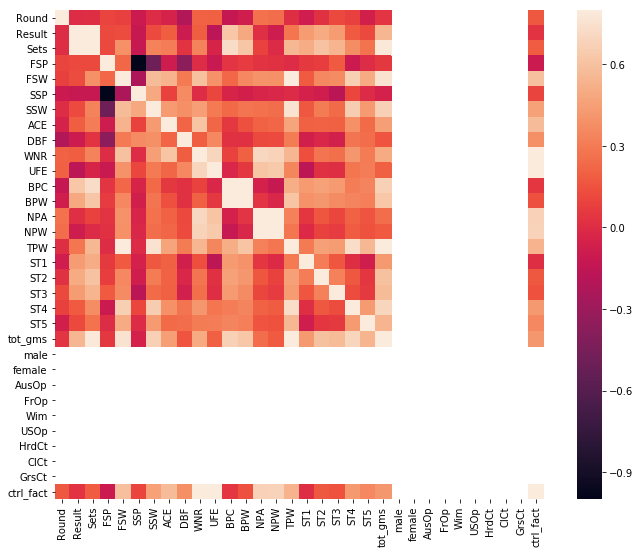

In [10]:
corrmat = aus_open_m.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

NPA and NPW missing some

### Women

In [11]:
aus_open_w = pd.read_csv('AusOpen-women-2013.csv')
aus_open_w.head()

,Player1,Round,Result,FNL1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,5.0,10.0,10.0,11.0,58,6.0,6.0,NaN,NaN,NaN
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,5.0,10.0,NaN,NaN,78,2.0,6.0,6.0,NaN,NaN
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,0.0,2.0,NaN,NaN,37,0.0,1.0,NaN,NaN,NaN
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,4.0,7.0,10.0,13.0,88,5.0,6.0,3.0,NaN,NaN
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,7.0,10.0,7.0,10.0,74,6.0,6.0,NaN,NaN,NaN


In [12]:
aus_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']
aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,5.0,10.0,10.0,11.0,58,6.0,6.0,NaN,NaN,NaN
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,5.0,10.0,NaN,NaN,78,2.0,6.0,6.0,NaN,NaN
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,0.0,2.0,NaN,NaN,37,0.0,1.0,NaN,NaN,NaN
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,4.0,7.0,10.0,13.0,88,5.0,6.0,3.0,NaN,NaN
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,7.0,10.0,7.0,10.0,74,6.0,6.0,NaN,NaN,NaN


In [13]:
aus_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = aus_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
aus_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = aus_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)
aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,5.0,10.0,10.0,11.0,58,6.0,6.0,0.0,0.0,0.0
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,5.0,10.0,0.0,0.0,78,2.0,6.0,6.0,0.0,0.0
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,0.0,2.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,4.0,7.0,10.0,13.0,88,5.0,6.0,3.0,0.0,0.0
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,7.0,10.0,7.0,10.0,74,6.0,6.0,0.0,0.0,0.0


In [14]:
aus_open_w['ST1'] = aus_open_w['ST1'].astype(np.int)
aus_open_w['ST2'] = aus_open_w['ST2'].astype(np.int)
aus_open_w['ST3'] = aus_open_w['ST3'].astype(np.int)
aus_open_w['ST4'] = aus_open_w['ST4'].astype(np.int)
aus_open_w['ST5'] = aus_open_w['ST5'].astype(np.int)

In [15]:
aus_open_w['tot_gms'] = aus_open_w['ST1'] + aus_open_w['ST2'] + aus_open_w['ST3'] + aus_open_w['ST4'] + aus_open_w['ST5']
aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5,tot_gms
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,10.0,10.0,11.0,58,6,6,0,0,0,12
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,10.0,0.0,0.0,78,2,6,6,0,0,14
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,2.0,0.0,0.0,37,0,1,0,0,0,1
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,7.0,10.0,13.0,88,5,6,3,0,0,14
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,10.0,7.0,10.0,74,6,6,0,0,0,12


In [16]:
aus_open_w['male'] = 0
aus_open_w['female'] = 1
aus_open_w['AusOp'] = 1
aus_open_w['FrOp'] = 0
aus_open_w['Wim'] = 0
aus_open_w['USOp'] = 0
aus_open_w['HrdCt'] = 1
aus_open_w['ClCt'] = 0
aus_open_w['GrsCt'] = 0

aus_open_w['ctrl_fact'] = aus_open_w['ACE'] + aus_open_w['DBF'] + aus_open_w['WNR']+aus_open_w['UFE']

aus_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,Serena Williams,1,1,2.0,59,20,41,8,6.0,2.0,...,0,1,1,0,0,0,1,0,0,56.0
1,Vesna Dolonc,1,1,2.0,65,33,35,10,7.0,4.0,...,0,1,1,0,0,0,1,0,0,22.0
2,Pauline Parmentier,1,0,0.0,63,16,37,4,3.0,6.0,...,0,1,1,0,0,0,1,0,0,18.0
3,Heather Watson,1,0,1.0,61,41,39,19,8.0,3.0,...,0,1,1,0,0,0,1,0,0,83.0
4,Samantha Stosur,1,1,2.0,65,28,35,11,6.0,1.0,...,0,1,1,0,0,0,1,0,0,44.0


inconsistent NPA and NPW

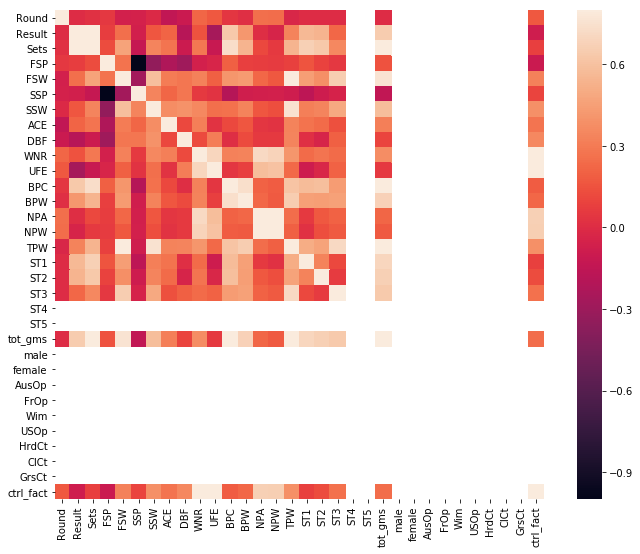

In [17]:
corrmat = aus_open_w.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## French Open

### Men

In [18]:
fr_open_m = pd.read_csv('FrenchOpen-men-2013.csv')
fr_open_m.head()

,Player1,Round,Result,FNL.1,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1
0,Pablo Carreno-Busta,1,0,0,62,27,38,11,1,3.0,...,1,3,9,20,50,2,2,3.0,NaN,NaN
1,Somdev Devvarman,1,1,3,62,54,38,22,7,3.0,...,5,8,12,21,120,6,6,7.0,NaN,NaN
2,Tobias Kamke,1,1,3,62,53,38,15,4,6.0,...,10,22,14,32,140,6,6,3.0,0.0,6.0
3,Julien Benneteau,1,1,3,72,87,28,19,14,2.0,...,4,13,14,30,163,7,6,5.0,7.0,NaN
4,Lukas Lacko,1,0,0,52,31,48,22,4,4.0,...,1,1,3,5,72,3,4,4.0,NaN,NaN


In [19]:
fr_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

fr_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = fr_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
fr_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = fr_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


fr_open_m['ST1'] = fr_open_m['ST1'].astype(np.int)
fr_open_m['ST2'] = fr_open_m['ST2'].astype(np.int)
fr_open_m['ST3'] = fr_open_m['ST3'].astype(np.int)
fr_open_m['ST4'] = fr_open_m['ST4'].astype(np.int)
fr_open_m['ST5'] = fr_open_m['ST5'].astype(np.int)

fr_open_m['tot_gms'] = fr_open_m['ST1'] + fr_open_m['ST2'] + fr_open_m['ST3'] + fr_open_m['ST4'] + fr_open_m['ST5']

fr_open_m['male'] = 1
fr_open_m['female'] = 0
fr_open_m['AusOp'] = 0
fr_open_m['FrOp'] = 1
fr_open_m['Wim'] = 0
fr_open_m['USOp'] = 0
fr_open_m['HrdCt'] = 0
fr_open_m['ClCt'] = 1
fr_open_m['GrsCt'] = 0

fr_open_m['ctrl_fact'] = fr_open_m['ACE'] + fr_open_m['DBF'] + fr_open_m['WNR']+fr_open_m['UFE']

fr_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,Pablo Carreno-Busta,1,0,0,62,27,38,11,1,3.0,...,1,0,0,1,0,0,0,1,0,45.0
1,Somdev Devvarman,1,1,3,62,54,38,22,7,3.0,...,1,0,0,1,0,0,0,1,0,56.0
2,Tobias Kamke,1,1,3,62,53,38,15,4,6.0,...,1,0,0,1,0,0,0,1,0,107.0
3,Julien Benneteau,1,1,3,72,87,28,19,14,2.0,...,1,0,0,1,0,0,0,1,0,91.0
4,Lukas Lacko,1,0,0,52,31,48,22,4,4.0,...,1,0,0,1,0,0,0,1,0,53.0


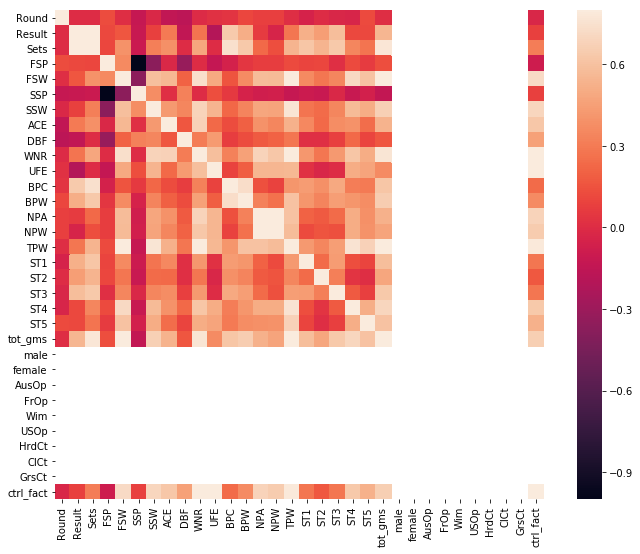

In [20]:
corrmat = fr_open_m.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Women

In [21]:
fr_open_w = pd.read_csv('FrenchOpen-women-2013.csv')

fr_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

fr_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = fr_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
fr_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = fr_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


fr_open_w['ST1'] = fr_open_w['ST1'].astype(np.int)
fr_open_w['ST2'] = fr_open_w['ST2'].astype(np.int)
fr_open_w['ST3'] = fr_open_w['ST3'].astype(np.int)
fr_open_w['ST4'] = fr_open_w['ST4'].astype(np.int)
fr_open_w['ST5'] = fr_open_w['ST5'].astype(np.int)

fr_open_w['tot_gms'] = fr_open_w['ST1'] + fr_open_w['ST2'] + fr_open_w['ST3'] + fr_open_w['ST4'] + fr_open_w['ST5']

fr_open_w['male'] = 0
fr_open_w['female'] = 1
fr_open_w['AusOp'] = 0
fr_open_w['FrOp'] = 1
fr_open_w['Wim'] = 0
fr_open_w['USOp'] = 0
fr_open_w['HrdCt'] = 0
fr_open_w['ClCt'] = 1
fr_open_w['GrsCt'] = 0

fr_open_w['ctrl_fact'] = fr_open_w['ACE'] + fr_open_w['DBF'] + fr_open_w['WNR']+fr_open_w['UFE']

fr_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,Su-Wei Hsieh,1,0,0,62,18,38,5,0.0,3.0,...,0,1,0,1,0,0,0,1,0,19.0
1,Eugenie Bouchard,1,1,2,57,23,43,17,3.0,1.0,...,0,1,0,1,0,0,0,1,0,62.0
2,Jie Zheng,1,1,2,76,30,24,5,1.0,0.0,...,0,1,0,1,0,0,0,1,0,39.0
3,Tamira Paszek,1,0,0,59,16,41,8,2.0,6.0,...,0,1,0,1,0,0,0,1,0,67.0
4,Karin Knapp,1,0,0,57,18,43,13,0.0,3.0,...,0,1,0,1,0,0,0,1,0,45.0


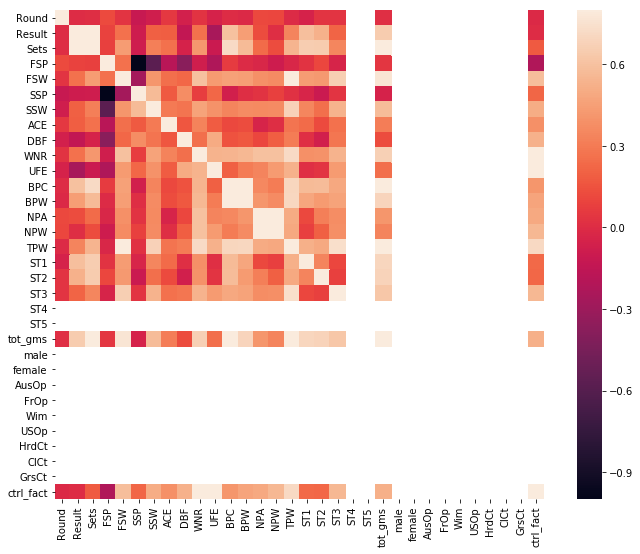

In [22]:
corrmat = fr_open_w.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Wimbledon

### Men

In [23]:
wim_open_m = pd.read_csv('Wimbledon-men-2013.csv')

wim_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

wim_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = wim_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
wim_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = wim_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


wim_open_m['ST1'] = wim_open_m['ST1'].astype(np.int)
wim_open_m['ST2'] = wim_open_m['ST2'].astype(np.int)
wim_open_m['ST3'] = wim_open_m['ST3'].astype(np.int)
wim_open_m['ST4'] = wim_open_m['ST4'].astype(np.int)
wim_open_m['ST5'] = wim_open_m['ST5'].astype(np.int)

wim_open_m['tot_gms'] = wim_open_m['ST1'] + wim_open_m['ST2'] + wim_open_m['ST3'] + wim_open_m['ST4'] + wim_open_m['ST5']

wim_open_m['male'] = 1
wim_open_m['female'] = 0
wim_open_m['AusOp'] = 0
wim_open_m['FrOp'] = 0
wim_open_m['Wim'] = 1
wim_open_m['USOp'] = 0
wim_open_m['HrdCt'] = 0
wim_open_m['ClCt'] = 0
wim_open_m['GrsCt'] = 1

wim_open_m['ctrl_fact'] = wim_open_m['ACE'] + wim_open_m['DBF'] + wim_open_m['WNR']+wim_open_m['UFE']

wim_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,B.Becker,1,0,0,59,29,41,14,5,1.0,...,1,0,0,0,1,0,0,0,1,50.0
1,J.Ward,1,0,1,62,77,38,35,18,4.0,...,1,0,0,0,1,0,0,0,1,110.0
2,N.Mahut,1,1,3,72,44,28,10,17,3.0,...,1,0,0,0,1,0,0,0,1,79.0
3,T.Robredo,1,1,3,77,40,23,12,6,0.0,...,1,0,0,0,1,0,0,0,1,42.0
4,R.Haase,1,0,0,68,61,32,15,7,2.0,...,1,0,0,0,1,0,0,0,1,70.0


missing TPW

### Women

In [24]:
wim_open_w = pd.read_csv('Wimbledon-women-2013.csv')

wim_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

wim_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = wim_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
wim_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = wim_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


wim_open_w['ST1'] = wim_open_w['ST1'].astype(np.int)
wim_open_w['ST2'] = wim_open_w['ST2'].astype(np.int)
wim_open_w['ST3'] = wim_open_w['ST3'].astype(np.int)
wim_open_w['ST4'] = wim_open_w['ST4'].astype(np.int)
wim_open_w['ST5'] = wim_open_w['ST5'].astype(np.int)

wim_open_w['tot_gms'] = wim_open_w['ST1'] + wim_open_w['ST2'] + wim_open_w['ST3'] + wim_open_w['ST4'] + wim_open_w['ST5']

wim_open_w['male'] = 0
wim_open_w['female'] = 1
wim_open_w['AusOp'] = 0
wim_open_w['FrOp'] = 0
wim_open_w['Wim'] = 1
wim_open_w['USOp'] = 0
wim_open_w['HrdCt'] = 0
wim_open_w['ClCt'] = 0
wim_open_w['GrsCt'] = 1

wim_open_w['ctrl_fact'] = wim_open_w['ACE'] + wim_open_w['DBF'] + wim_open_w['WNR']+wim_open_w['UFE']

wim_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,M.Koehler,1,0,0,60,21,40,8,2.0,4,...,0,1,0,0,1,0,0,0,1,43.0
1,E.Baltacha,1,0,0,69,23,31,6,0.0,0,...,0,1,0,0,1,0,0,0,1,22.0
2,S-W.Hsieh,1,1,2,63,17,37,10,1.0,1,...,0,1,0,0,1,0,0,0,1,38.0
3,A.Cornet,1,1,2,57,36,43,21,4.0,4,...,0,1,0,0,1,0,0,0,1,73.0
4,Y.Putintseva,1,0,0,73,34,27,12,2.0,2,...,0,1,0,0,1,0,0,0,1,56.0


missing TPW

## US Open

### Men

In [45]:
us_open_m = pd.read_csv('USOpen-men-2013.csv')

us_open_m.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

us_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = us_open_m[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
us_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = us_open_m[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


us_open_m['ST1'] = us_open_m['ST1'].astype(np.int)
us_open_m['ST2'] = us_open_m['ST2'].astype(np.int)
us_open_m['ST3'] = us_open_m['ST3'].astype(np.int)
us_open_m['ST4'] = us_open_m['ST4'].astype(np.int)
us_open_m['ST5'] = us_open_m['ST5'].astype(np.int)

us_open_m['tot_gms'] = us_open_m['ST1'] + us_open_m['ST2'] + us_open_m['ST3'] + us_open_m['ST4'] + us_open_m['ST5']

#us_open_m['WNR'] = us_open_m['WNR'].fillna(aus_open_m['WNR'].median)
us_open_m['UFE'] = us_open_m['UFE'].fillna(aus_open_m['UFE'].median)


us_open_m['male'] = 1
us_open_m['female'] = 0
us_open_m['AusOp'] = 0
us_open_m['FrOp'] = 0
us_open_m['Wim'] = 0
us_open_m['USOp'] = 1
us_open_m['HrdCt'] = 1
us_open_m['ClCt'] = 0
us_open_m['GrsCt'] = 0

us_open_m['ctrl_fact'] = us_open_m['ACE'] + us_open_m['DBF'] + us_open_m['WNR']+us_open_m['UFE']

us_open_m.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,Richard Gasquet,1,1,3,63,45,37,16,7,7,...,1,0,0,0,0,1,1,0,0,NaN
1,Stephane Robert,1,1,3,61,44,39,19,3,2,...,1,0,0,0,0,1,1,0,0,NaN
2,Jan-Lennard Struff,1,0,2,55,61,45,32,11,13,...,1,0,0,0,0,1,1,0,0,NaN
3,Aljaz Bedene,1,0,1,52,41,48,19,13,8,...,1,0,0,0,0,1,1,0,0,NaN
4,Feliciano Lopez,1,1,3,58,54,42,30,21,3,...,1,0,0,0,0,1,1,0,0,NaN


missing WIN and UFE

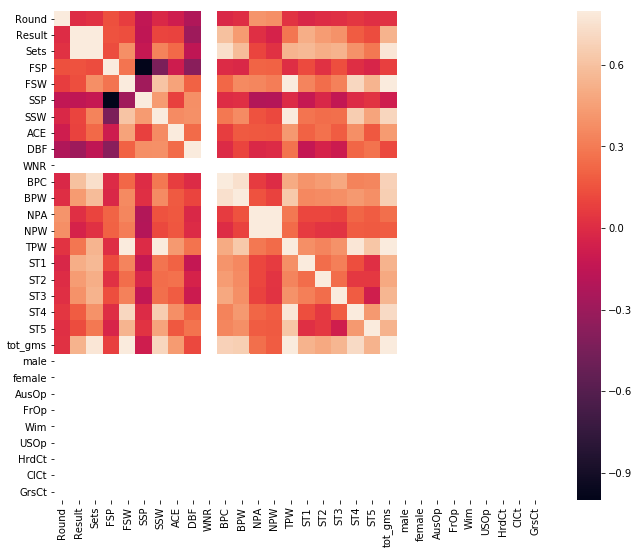

In [26]:
corrmat = us_open_m.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Women

In [27]:
us_open_w = pd.read_csv('USOpen-women-2013.csv')

us_open_w.columns = ['Player', 'Round', 'Result', 'Sets', 'FSP', 'FSW', 'SSP', 'SSW', 
                      'ACE', 'DBF', 'WNR', 'UFE', 'BPC', 'BPW', 'NPA', 'NPW', 'TPW', 'ST1', 
                     'ST2', 'ST3', 'ST4', 'ST5']

us_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']] = us_open_w[['ST1', 'ST2', 'ST3', 'ST4', 'ST5']].fillna(value=0)
us_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']] = us_open_w[['Sets', 'ACE', 'DBF', 'BPC', 'BPW', 'NPA', 'NPW']].fillna(value=0)


us_open_w['ST1'] = us_open_w['ST1'].astype(np.int)
us_open_w['ST2'] = us_open_w['ST2'].astype(np.int)
us_open_w['ST3'] = us_open_w['ST3'].astype(np.int)
us_open_w['ST4'] = us_open_w['ST4'].astype(np.int)
us_open_w['ST5'] = us_open_w['ST5'].astype(np.int)

us_open_w['tot_gms'] = us_open_w['ST1'] + us_open_w['ST2'] + us_open_w['ST3'] + us_open_w['ST4'] + us_open_w['ST5']

us_open_w['male'] = 0
us_open_w['female'] = 1
us_open_w['AusOp'] = 0
us_open_w['FrOp'] = 0
us_open_w['Wim'] = 0
us_open_w['USOp'] = 1
us_open_w['HrdCt'] = 1
us_open_w['ClCt'] = 0
us_open_w['GrsCt'] = 0

us_open_w['TPW'] = us_open_w['TPW'].fillna(aus_open_m['TPW'].median)

us_open_w['ctrl_fact'] = us_open_w['ACE'] + us_open_w['DBF'] + us_open_w['WNR']+us_open_w['UFE']

us_open_w.head()

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,S Williams,7,1,2,57,44,43,20,9,5,...,0,1,0,0,0,1,1,0,0,85
1,F Pennetta,6,0,0,44,12,56,7,1,3,...,0,1,0,0,0,1,1,0,0,46
2,S Williams,6,1,2,63,26,37,9,4,1,...,0,1,0,0,0,1,1,0,0,44
3,R Vinci,5,0,0,60,21,40,7,0,3,...,0,1,0,0,0,1,1,0,0,45
4,D Hantuchova,5,0,0,58,14,42,5,3,3,...,0,1,0,0,0,1,1,0,0,43


missing TPW

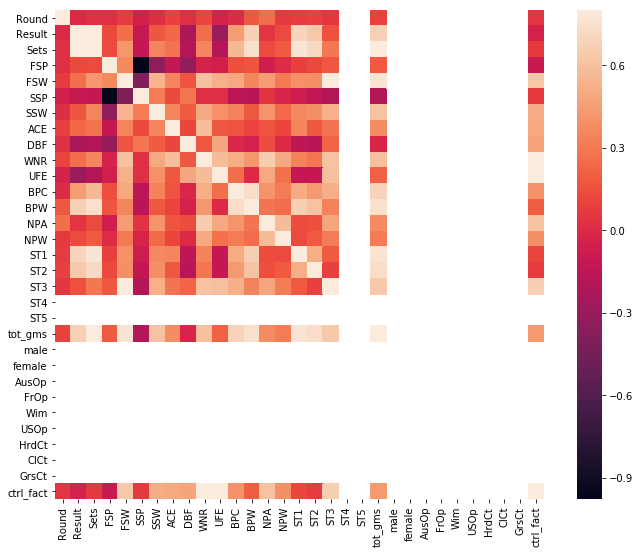

In [28]:
corrmat = us_open_w.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## All Together Now!

In [29]:
all_tournaments = [aus_open_m, aus_open_w, fr_open_m, fr_open_w, wim_open_m, wim_open_w, us_open_m, us_open_w]
matches = pd.concat(all_tournaments).reset_index(drop=True)

matches

,Player,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
0,Lukas Lacko,1,0,0.0,61,35,39,18,5.0,1.0,...,1,0,1,0,0,0,1,0,0,52
1,Leonardo Mayer,1,1,3.0,61,31,39,13,13.0,1.0,...,1,0,1,0,0,0,1,0,0,28
2,Marcos Baghdatis,1,0,0.0,52,53,48,20,8.0,4.0,...,1,0,1,0,0,0,1,0,0,99
3,Dmitry Tursunov,1,1,3.0,53,39,47,24,8.0,6.0,...,1,0,1,0,0,0,1,0,0,28
4,Juan Monaco,1,0,1.0,76,63,24,12,0.0,4.0,...,1,0,1,0,0,0,1,0,0,55
5,Santiago Giraldo,1,0,1.0,65,51,35,22,9.0,3.0,...,1,0,1,0,0,0,1,0,0,88
6,Dudi Sela,1,0,2.0,68,73,32,24,5.0,3.0,...,1,0,1,0,0,0,1,0,0,99
7,Fabio Fognini,1,1,2.0,47,18,53,15,3.0,4.0,...,1,0,1,0,0,0,1,0,0,59
8,David Guez,1,0,0.0,64,26,36,12,3.0,0.0,...,1,0,1,0,0,0,1,0,0,62
9,Nikolay Davydenko,1,1,3.0,77,76,23,11,6.0,4.0,...,1,0,1,0,0,0,1,0,0,20


In [30]:
list(matches)

['Player',
 'Round',
 'Result',
 'Sets',
 'FSP',
 'FSW',
 'SSP',
 'SSW',
 'ACE',
 'DBF',
 'WNR',
 'UFE',
 'BPC',
 'BPW',
 'NPA',
 'NPW',
 'TPW',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'tot_gms',
 'male',
 'female',
 'AusOp',
 'FrOp',
 'Wim',
 'USOp',
 'HrdCt',
 'ClCt',
 'GrsCt',
 'ctrl_fact']

In [31]:
matches.isnull().sum()

Player         0
Round          0
Result         0
Sets           0
FSP            0
FSW            0
SSP            0
SSW            0
ACE            0
DBF            0
WNR          252
UFE            0
BPC            0
BPW            0
NPA            0
NPW            0
TPW          472
ST1            0
ST2            0
ST3            0
ST4            0
ST5            0
tot_gms        0
male           0
female         0
AusOp          0
FrOp           0
Wim            0
USOp           0
HrdCt          0
ClCt           0
GrsCt          0
ctrl_fact    252
dtype: int64

In [32]:
matches['Sets'].fillna(0, inplace=True)
matches['ACE'].fillna(0, inplace=True)
matches['DBF'].fillna(0, inplace=True)
matches['BPC'].fillna(0, inplace=True)
matches['BPW'].fillna(0, inplace=True)

In [33]:
matches.isnull().sum()

Player         0
Round          0
Result         0
Sets           0
FSP            0
FSW            0
SSP            0
SSW            0
ACE            0
DBF            0
WNR          252
UFE            0
BPC            0
BPW            0
NPA            0
NPW            0
TPW          472
ST1            0
ST2            0
ST3            0
ST4            0
ST5            0
tot_gms        0
male           0
female         0
AusOp          0
FrOp           0
Wim            0
USOp           0
HrdCt          0
ClCt           0
GrsCt          0
ctrl_fact    252
dtype: int64

In [34]:
matches['NPA'].fillna(matches['NPA'].mean, inplace=True)
matches['NPW'].fillna(matches['NPW'].mean, inplace=True)

In [35]:
matches.isnull().sum()

Player         0
Round          0
Result         0
Sets           0
FSP            0
FSW            0
SSP            0
SSW            0
ACE            0
DBF            0
WNR          252
UFE            0
BPC            0
BPW            0
NPA            0
NPW            0
TPW          472
ST1            0
ST2            0
ST3            0
ST4            0
ST5            0
tot_gms        0
male           0
female         0
AusOp          0
FrOp           0
Wim            0
USOp           0
HrdCt          0
ClCt           0
GrsCt          0
ctrl_fact    252
dtype: int64

In [36]:
us_open_m.describe()

,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,WNR,...,tot_gms,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,0.0,...,252.000000,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
mean,1.944444,0.500000,1.861111,58.785714,47.186508,41.214286,23.253968,8.884921,4.773810,NaN,...,17.904762,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
std,1.276858,0.500995,1.246731,7.271740,14.938684,7.271740,8.965571,6.247123,2.934957,NaN,...,6.109790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,38.000000,10.000000,16.000000,2.000000,0.000000,0.000000,NaN,...,2.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25%,1.000000,0.000000,1.000000,54.000000,36.750000,37.000000,16.750000,5.000000,3.000000,NaN,...,14.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
50%,1.000000,0.500000,2.000000,58.000000,46.000000,42.000000,23.000000,8.000000,4.000000,NaN,...,18.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
75%,2.000000,1.000000,3.000000,63.000000,58.000000,46.000000,29.000000,11.000000,7.000000,NaN,...,23.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
max,7.000000,1.000000,3.000000,84.000000,90.000000,62.000000,48.000000,39.000000,15.000000,NaN,...,30.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [37]:
aus_open_m.describe()

,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,WNR,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.000000
mean,1.936508,0.500000,1.793651,61.384921,48.972222,38.615079,21.658730,9.753968,4.440476,32.980159,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,80.337302
std,1.273362,0.500995,1.276933,7.264404,15.741792,7.264404,8.558366,6.933016,3.328081,18.311482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.070870
min,1.000000,0.000000,0.000000,44.000000,14.000000,17.000000,3.000000,0.000000,0.000000,1.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.000000
25%,1.000000,0.000000,0.000000,57.000000,38.000000,34.000000,16.000000,5.000000,2.000000,20.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,55.000000
50%,1.000000,0.500000,2.000000,61.000000,47.000000,39.000000,21.000000,8.000000,4.000000,32.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,78.000000
75%,2.000000,1.000000,3.000000,66.000000,59.000000,43.000000,26.250000,13.000000,6.000000,45.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,106.000000
max,7.000000,1.000000,3.000000,83.000000,114.000000,56.000000,57.000000,41.000000,18.000000,111.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,237.000000


In [38]:
matches['WNR'].fillna(aus_open_m['WNR'].mean, inplace=True)
matches['UFE'].fillna(aus_open_m['UFE'].mean, inplace=True)

In [39]:
matches.isnull().sum()

Player         0
Round          0
Result         0
Sets           0
FSP            0
FSW            0
SSP            0
SSW            0
ACE            0
DBF            0
WNR            0
UFE            0
BPC            0
BPW            0
NPA            0
NPW            0
TPW          472
ST1            0
ST2            0
ST3            0
ST4            0
ST5            0
tot_gms        0
male           0
female         0
AusOp          0
FrOp           0
Wim            0
USOp           0
HrdCt          0
ClCt           0
GrsCt          0
ctrl_fact    252
dtype: int64

In [40]:
us_open_w.describe()

,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,WNR,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.000000
mean,2.328947,0.500000,1.131579,60.776316,26.592105,39.618421,11.789474,2.578947,3.618421,19.460526,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,52.671053
std,1.394295,0.501653,0.925605,9.604909,11.038377,9.580564,5.371783,2.623193,2.372397,10.102705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.249868
min,1.000000,0.000000,0.000000,41.000000,8.000000,7.000000,1.000000,0.000000,0.000000,2.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.000000
25%,1.000000,0.000000,0.000000,54.000000,19.000000,33.750000,7.750000,1.000000,2.000000,13.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,36.000000
50%,2.000000,0.500000,1.500000,60.000000,25.000000,41.000000,11.500000,2.000000,3.000000,18.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,50.000000
75%,3.000000,1.000000,2.000000,67.000000,32.000000,46.000000,15.000000,4.000000,5.000000,24.250000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,65.000000
max,7.000000,1.000000,2.000000,93.000000,54.000000,59.000000,27.000000,15.000000,10.000000,49.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,108.000000


In [41]:
aus_open_w.describe()

,Round,Result,Sets,FSP,FSW,SSP,SSW,ACE,DBF,WNR,...,male,female,AusOp,FrOp,Wim,USOp,HrdCt,ClCt,GrsCt,ctrl_fact
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.000000
mean,1.944882,0.500000,1.157480,61.484252,27.255906,38.515748,11.744094,2.787402,3.933071,17.456693,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,49.381890
std,1.271811,0.500987,0.901691,9.426948,10.073714,9.426948,5.460735,2.651362,2.751832,11.238877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.313369
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.000000
25%,1.000000,0.000000,0.000000,56.000000,20.000000,33.000000,8.000000,1.000000,2.000000,9.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32.000000
50%,1.000000,0.500000,1.000000,61.000000,26.000000,39.000000,11.000000,2.000000,3.000000,17.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,49.000000
75%,2.000000,1.000000,2.000000,67.000000,34.000000,44.000000,15.000000,4.000000,6.000000,24.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65.000000
max,7.000000,1.000000,2.000000,86.000000,57.000000,100.000000,30.000000,13.000000,13.000000,57.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,134.000000


In [42]:
list(matches)

['Player',
 'Round',
 'Result',
 'Sets',
 'FSP',
 'FSW',
 'SSP',
 'SSW',
 'ACE',
 'DBF',
 'WNR',
 'UFE',
 'BPC',
 'BPW',
 'NPA',
 'NPW',
 'TPW',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'tot_gms',
 'male',
 'female',
 'AusOp',
 'FrOp',
 'Wim',
 'USOp',
 'HrdCt',
 'ClCt',
 'GrsCt',
 'ctrl_fact']

In [43]:
matches['Round'] = matches['Round'].astype(np.int)
matches['Result'] = matches['Result'].astype(np.int)
matches['Sets'] = matches['Sets'].astype(np.int)
matches['FSP'] = matches['FSP'].astype(np.int)
matches['FSW'] = matches['FSW'].astype(np.int)
matches['SSP'] = matches['SSP'].astype(np.int)
matches['SSW'] = matches['SSW'].astype(np.int)
matches['ACE'] = matches['ACE'].astype(np.int)
matches['DBF'] = matches['DBF'].astype(np.int)
matches['WNR'] = matches['WNR'].astype(np.int)
#matches['UFE'] = matches['UFE'].astype(np.int)
matches['BPC'] = matches['BPC'].astype(np.int)
matches['BPW'] = matches['BPW'].astype(np.int)
#matches['NPA'] = matches['NPA'].astype(np.int)
#matches['NPW'] = matches['NPW'].astype(np.int)
#matches['TPW'] = matches['TPW'].astype(np.int)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'method'

In [ ]:
matches['ctrl_fact'] = matches['ACE'] + matches['DBF'] + matches['WNR'] + matches['UFE']

In [ ]:
for col in matches:
    print(matches[col].apply(type))

In [ ]:
matches['WNR'].dtype()